In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

**##EDA Analysis**

#**#Churn Analysis with Gender**

In [8]:
pd.crosstab(df['Gender'], df['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


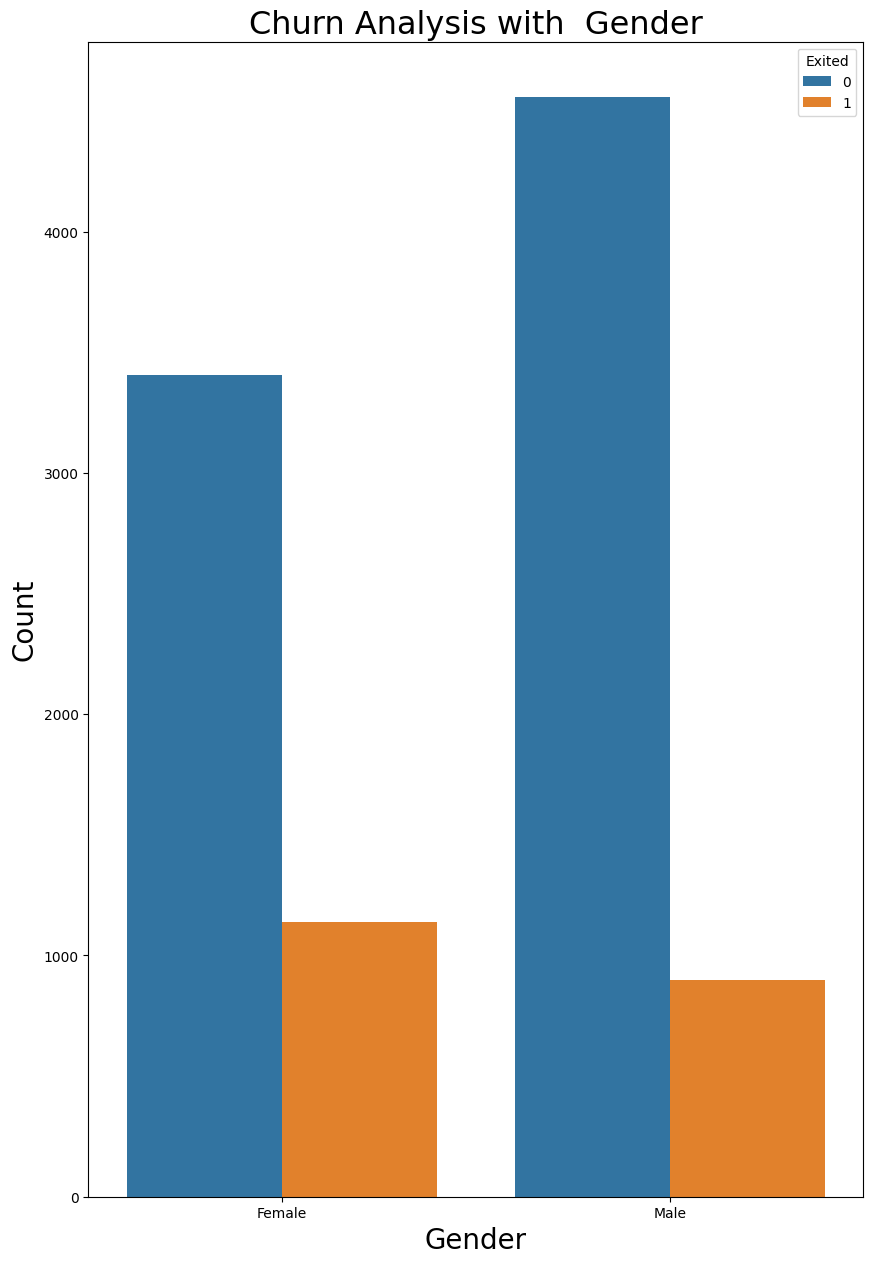

In [9]:
plt.figure(figsize=(10,15))
sns.countplot(df, x='Gender', hue='Exited')
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Churn Analysis with  Gender', fontsize=23)
plt.show()

**Observations:**
Higher Exit Rate for Females:

25.1% of female customers exited, compared to only 16.5% of male customers.

This suggests that female customers are more likely to leave than male customers.

More Male Customers Overall:

There are more male customers (5,457) than female customers (4,543) in the dataset.

Total Exits:

Despite the higher exit rate among females, the absolute number of exits is higher among females (1,139) than males (898).

**Churn Analysis among different countries**

In [10]:
counts= df[df['Exited']==1]['Geography'].value_counts()
counts

Geography
Germany    814
France     810
Spain      413
Name: count, dtype: int64

In [11]:
pd.crosstab(df['Geography'],df['Exited'] )

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


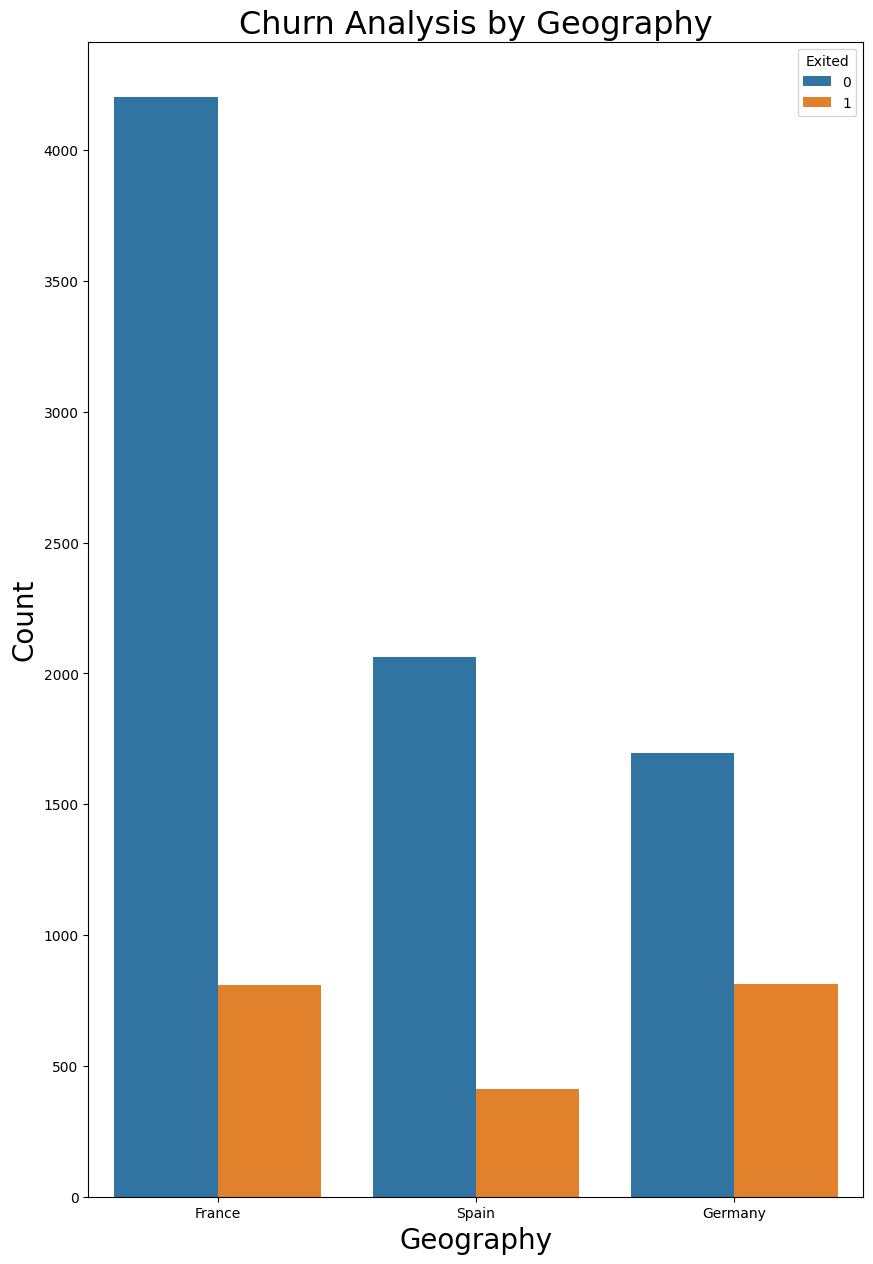

In [12]:
plt.figure(figsize=(10,15))
sns.countplot(df, x='Geography', hue='Exited')
plt.xlabel('Geography', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Churn Analysis by Geography', fontsize=23)
plt.show()


**Observations:**
Germany has the highest churn rate by far at 32.4%, which is about double the churn rate in France (16.2%) and Spain (16.7%).

While France and Germany have similar numbers of churned customers (~810), France has a much larger customer base, making its churn rate relatively low.

Spain’s churn rate is slightly higher than France’s, but both are much lower than Germany's.

**##Churn Analysis with Age**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

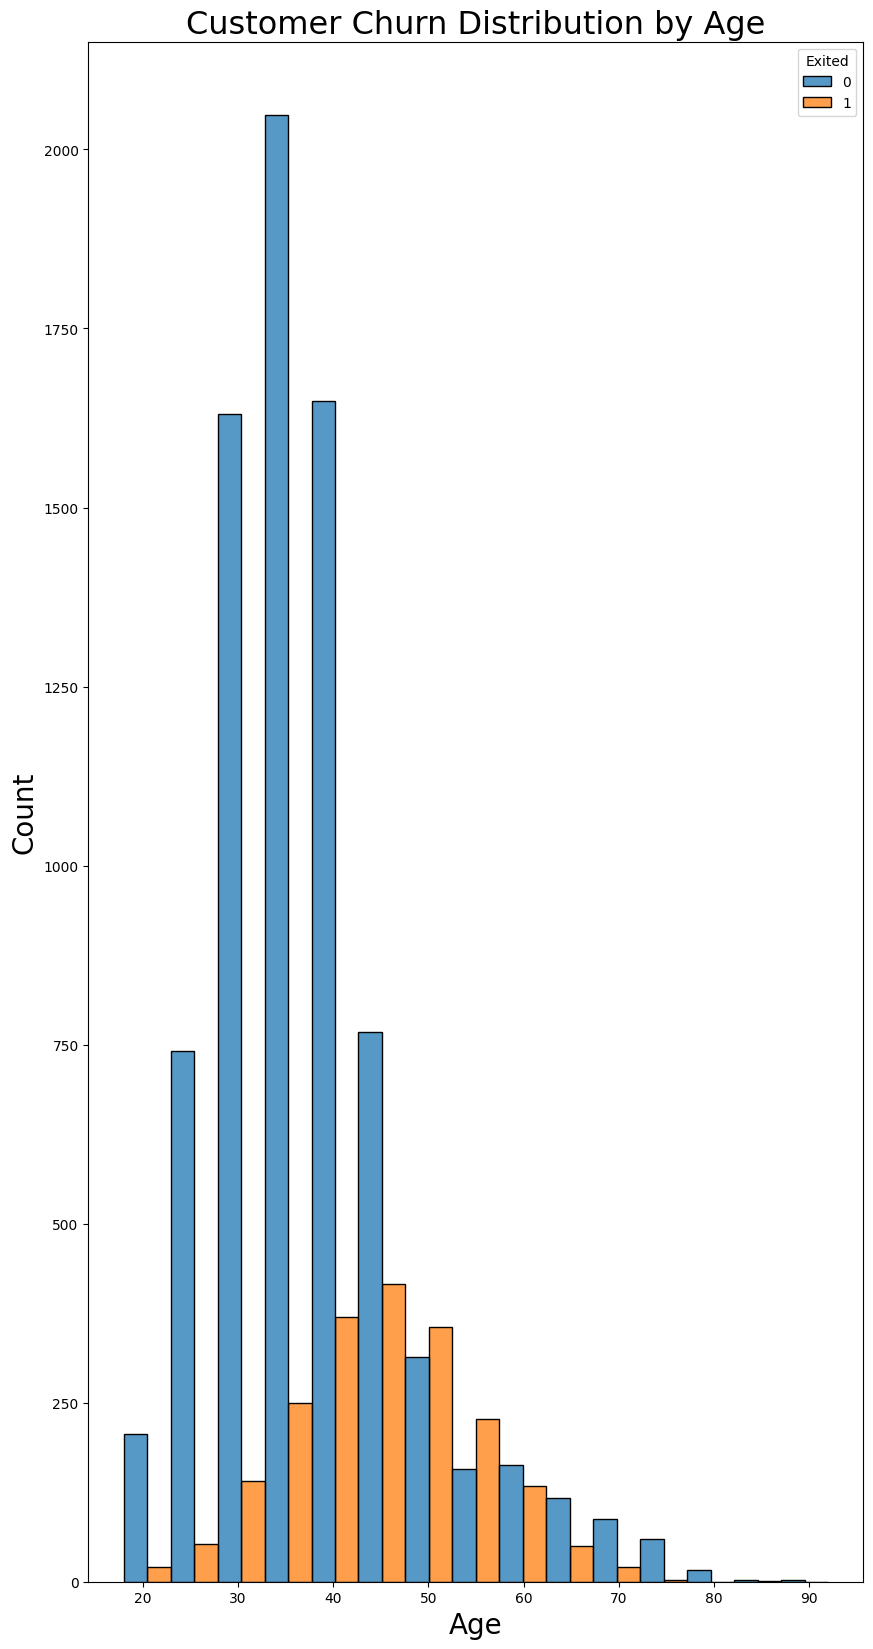

In [13]:
plt.figure(figsize=(10,20))
sns.histplot(df, x='Age', hue='Exited', multiple='dodge', bins=15)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Customer Churn Distribution by Age', fontsize=23)
plt.show()

**Observation:**
Analysis of customer churn across age groups reveals a notable concentration of exits among customers aged 35 to 55. This age range shows the highest number of churned customers compared to younger or older age brackets.

#**#Churn Analysis by Customer Tenure**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

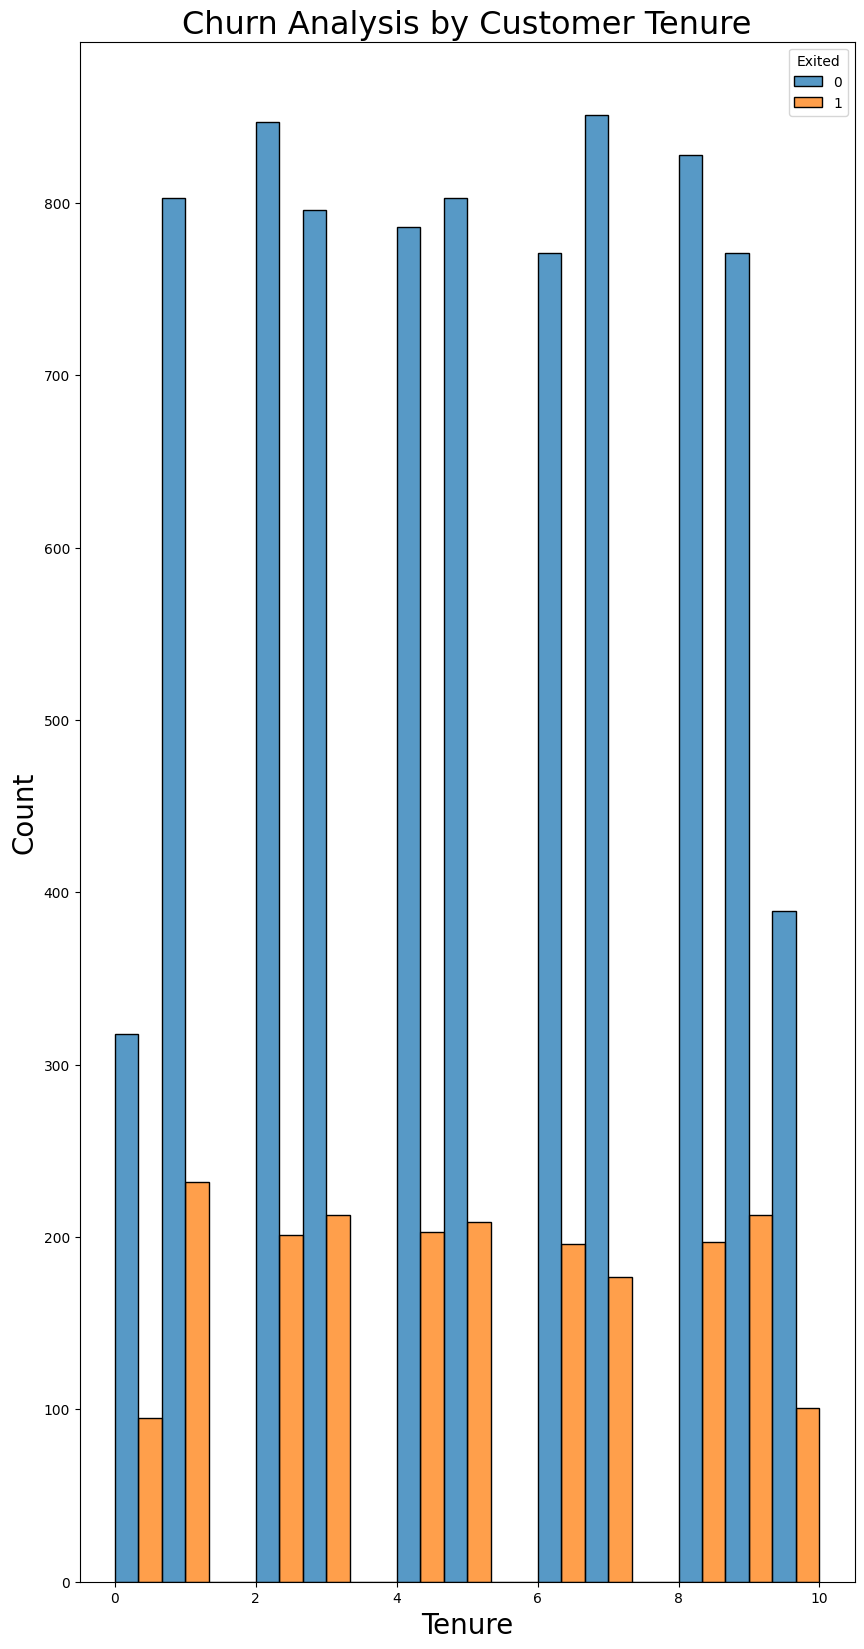

In [14]:
plt.figure(figsize=(10,20))
sns.histplot(df, x='Tenure', hue='Exited', multiple='dodge', bins=15)
plt.xlabel('Tenure', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Churn Analysis by Customer Tenure', fontsize=23)
plt.show()

**Churn Analysis by Credit Card Ownership**

In [15]:
pd.crosstab(df['HasCrCard'], df['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


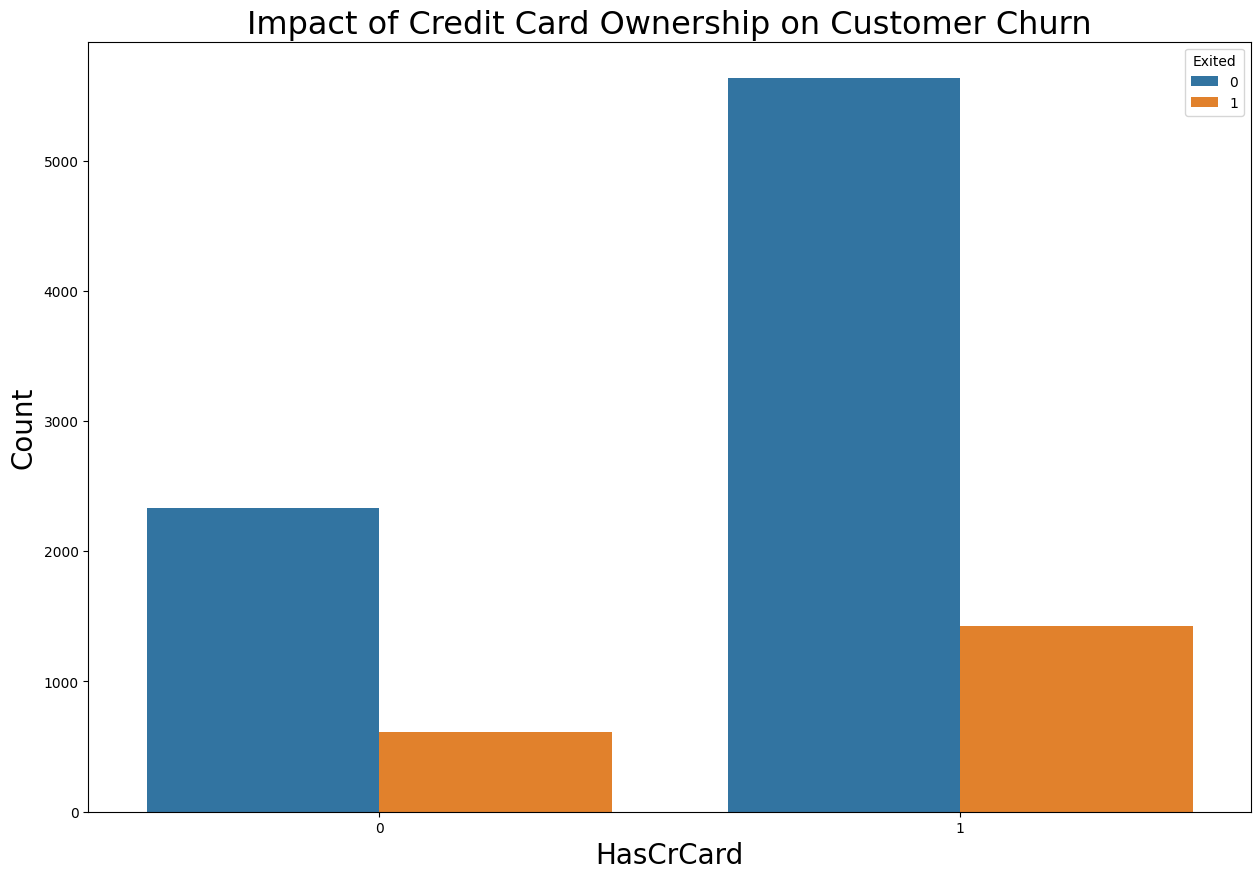

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df, x='HasCrCard', hue='Exited')
plt.xlabel('HasCrCard', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Impact of Credit Card Ownership on Customer Churn', fontsize=23)
plt.show()

**Observation:**
The churn rate is very similar for customers with a credit card (20.2%) and those without (20.8%).

This suggests that credit card ownership does not significantly affect the likelihood of customer churn in this dataset.

Despite a much larger number of customers having credit cards, the proportion of customers exiting is nearly the same across both groups.

**Machine Learning Analysis**

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df=df.drop(columns=['RowNumber', 'CustomerId', 'Surname' ])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [21]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


##**Spliting the data**

In [23]:
x=df.drop(columns=['Exited'])
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [24]:
y=df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

##**Logistic Regression and Decison Tree Classification**

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [26]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.84,1,0,1,45038.29
8285,609,0,1,25,10,0.00,1,0,1,109895.16
7853,730,0,0,47,7,0.00,1,1,0,33373.26
1095,692,0,1,29,4,0.00,1,1,0,76755.99


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)
x_train_scaled


array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [29]:
x_test_scaled=sc.transform(x_test)
x_test_scaled

array([[-0.57749609,  0.30164867,  0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  1.50884694, -1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987, -0.9055496 , -1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]])

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train_scaled, y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(x_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
from sklearn.metrics import *
accuracy_score=accuracy_score(y_test, y_pred)
accuracy_score

0.815

In [34]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1559,   48],
       [ 322,   71]])

In [35]:
Accuracy=(1559+71)/(1559+48+322+71)
Accuracy

0.815

In [39]:
Precision_0=71/(71+48)
Precision_0

0.5966386554621849

In [38]:
Precision_1=1559/(1559+322)
Precision_1

0.8288144603934078

##**DecisionTree**

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)

model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
from sklearn.metrics import *
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.782

In [45]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1358,  249],
       [ 187,  206]])

##**RandomForest Classification**

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0, stratify =y)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
493,531,0,0,47,6,0.00,1,0,0,194998.34
6839,724,1,1,36,6,94615.11,2,1,1,10627.21
170,484,0,0,29,4,130114.39,1,1,0,164017.89
4958,655,0,1,37,6,109093.41,2,1,0,1775.52
4271,465,0,1,33,5,0.00,2,0,1,78698.09
...,...,...,...,...,...,...,...,...,...,...
6727,745,0,0,36,9,0.00,1,1,0,19605.18
4674,850,1,1,41,1,176958.46,2,0,1,125806.30
6399,601,1,1,48,9,163630.76,1,0,1,41816.49
872,722,0,0,35,2,163943.89,2,1,1,15068.18


In [49]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1344,460,1,0,40,6,119507.58,2,1,0,91560.63
8167,713,1,0,24,7,147687.24,1,1,1,121592.50
4747,663,2,1,64,6,0.00,2,0,1,15876.52
5004,502,1,0,57,3,101465.31,1,1,0,43568.31
3124,760,0,1,39,6,178585.46,1,1,0,67131.30
...,...,...,...,...,...,...,...,...,...,...
9107,655,2,1,38,9,0.00,1,0,1,90490.33
8249,586,0,0,38,6,0.00,2,1,1,37935.83
8337,534,0,1,41,9,0.00,2,1,0,13871.34
6279,757,2,0,55,9,117294.12,4,1,0,94187.47


In [50]:
from sklearn.ensemble import RandomForestClassifier

RFmodel1=RandomForestClassifier(n_estimators=100)

RFmodel1.fit(x_train,y_train)


RandomForestClassifier()

In [51]:
y_pred=RFmodel1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [52]:
from sklearn.metrics import *
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.8615

In [53]:
confusion_matrix= confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1542,   51],
       [ 226,  181]])

In [54]:
Accuracy=(1542+181)/(1542+51+226+181)
Accuracy

0.8615

In [55]:
Precision_0=1542/(1542+226)
Precision_0

0.8721719457013575

In [56]:
Precision_1=181/(181+51)
Precision_1

0.7801724137931034